In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import relplot as rp

In [4]:
df = pd.read_csv('/data/ron/protein-conformal/data/sva_results_2024-05-31.csv')

In [5]:
df.head()

,p,x,y
0,0.000028,0.999852,False
1,0.000012,0.999819,False
2,0.000083,0.999842,False
3,0.000006,0.999827,False
4,0.000076,0.999826,False


In [6]:
# f: array of probabilities [f_i]
# y: array of binary labels [y_i]
f = df['p'].values
y = df['y'].values

calib_error = rp.smECE(f, y)   # compute calibration error (scalar)
print('calibration error:', rp.smECE(f, y))


calibration error: 0.00273631536422354


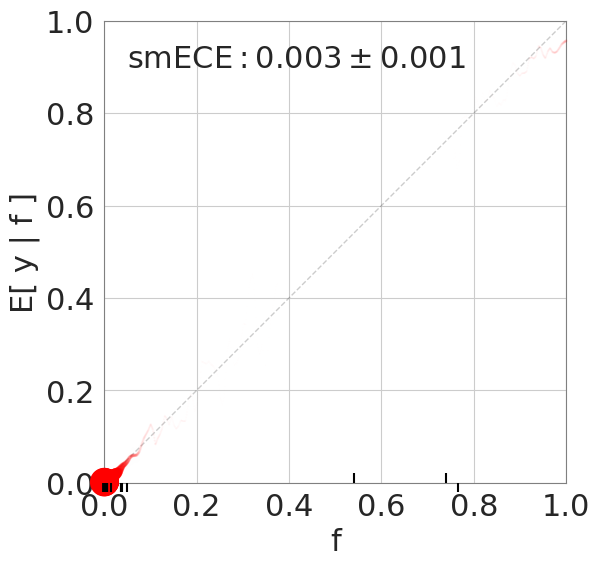

In [7]:
fig, ax = rp.rel_diagram(f, y) # plot

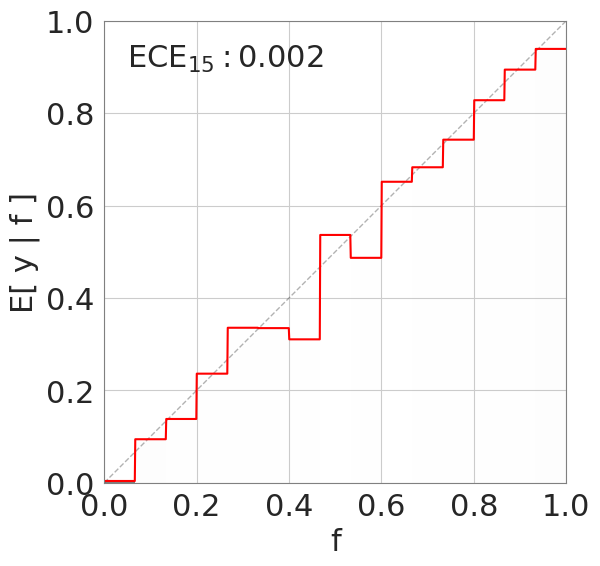

In [10]:
rp.rel_diagram_binned(f, y);
# save the plot as a pdf
plt.savefig('/data/ron/protein-conformal/figs/rel_diagram.pdf', format='pdf', bbox_inches='tight')